In [1]:
using Pkg
Pkg.add("DataFrames");
Pkg.add("CSV");

In [2]:
using DataFrames
using Statistics
using CSV

ENV["COLUMNS"] = 120

In [57]:
df = DataFrame(CSV.read("spx_options_2017.csv"))

,underlying,underlying_last,optionroot,type,expiration,quotedate,strike,last,bid,ask,volume
,String,Float64,String,String,Dates…,Dates…,Float64,Float64,Float64,Float64,Int64
1,SPX,2257.83,SPX170120C00100000,call,2017-01-20,2017-01-03,100.0,2161.5,2154.3,2158.7,0
2,SPX,2257.83,SPX170120C00200000,call,2017-01-20,2017-01-03,200.0,2060.95,2054.4,2058.8,0
3,SPX,2257.83,SPX170120C00300000,call,2017-01-20,2017-01-03,300.0,1960.45,1954.4,1958.8,0
4,SPX,2257.83,SPX170120C00400000,call,2017-01-20,2017-01-03,400.0,1760.55,1854.6,1858.9,0
5,SPX,2257.83,SPX170120C00500000,call,2017-01-20,2017-01-03,500.0,1749.33,1754.6,1758.9,0
6,SPX,2257.83,SPX170120C00550000,call,2017-01-20,2017-01-03,550.0,1699.43,1704.7,1709.0,0
7,SPX,2257.83,SPX170120C00600000,call,2017-01-20,2017-01-03,600.0,0.0,1654.7,1658.9,0
8,SPX,2257.83,SPX170120C00650000,call,2017-01-20,2017-01-03,650.0,0.0,1604.7,1609.0,0
9,SPX,2257.83,SPX170120C00700000,call,2017-01-20,2017-01-03,700.0,1435.6,1554.7,1559.0,0


In [58]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,underlying,,SPX,,SPXW,3,,String
2,underlying_last,2451.16,2257.83,2437.03,2690.21,,,Float64
3,optionroot,,SPX170120C00100000,,SPXW181231P03200000,60877,,String
4,type,,call,,put,2,,String
5,expiration,,2017-01-03,,2020-12-18,197,,Date
6,quotedate,,2017-01-03,,2017-12-29,251,,Date
7,strike,2109.5,100.0,2220.0,3800.0,,,Float64
8,last,70.8103,0.0,0.76,2592.34,,,Float64
9,bid,215.921,0.0,42.9,2587.1,,,Float64


In [59]:
df.dte = df.expiration - df.quotedate;

# Calls

#### Result 1: Relative Pricing under Distribution for $S$

$$C(K_2) = \left(\frac{K_2}{K_1}\right)^{1-\alpha} C(K_1)$$

In [61]:
function price_gen(C_1::Float64, K_1::Float64, S_0::Float64, α::Float64)
    return K_2::Float64 -> ((K_2 - S_0)/(K_1 - S_0))^(1-α) * C_1
end

price_gen (generic function with 1 method)

In [223]:
# First day's calls
calls = filter(
    x -> (x.underlying == "SPX") & (x.type == "call") &
         (1.1 * x.underlying_last < x.strike),
    df,
) |> x -> first(groupby(x, :quotedate));

,underlying,underlying_last,optionroot,type,expiration,quotedate,strike,last,bid,ask,volume
,String,Float64,String,String,Date,Date,Float64,Float64,Float64,Float64,Int64
1,SPX,2257.83,SPX170120C02500000,call,2017-01-20,2017-01-03,2500.0,0.05,0.05,0.1,58
2,SPX,2257.83,SPX170120C02525000,call,2017-01-20,2017-01-03,2525.0,0.05,0.05,0.1,17
3,SPX,2257.83,SPX170120C02550000,call,2017-01-20,2017-01-03,2550.0,0.05,0.0,0.1,0
4,SPX,2257.83,SPX170120C02575000,call,2017-01-20,2017-01-03,2575.0,0.05,0.0,0.05,0
5,SPX,2257.83,SPX170120C02600000,call,2017-01-20,2017-01-03,2600.0,0.05,0.0,0.05,20
6,SPX,2257.83,SPX170120C02650000,call,2017-01-20,2017-01-03,2650.0,0.05,0.0,0.1,0
7,SPX,2257.83,SPX170120C02700000,call,2017-01-20,2017-01-03,2700.0,0.05,0.0,0.05,0
8,SPX,2257.83,SPX170120C02750000,call,2017-01-20,2017-01-03,2750.0,0.05,0.0,0.05,0
9,SPX,2257.83,SPX170120C02800000,call,2017-01-20,2017-01-03,2800.0,0.05,0.0,0.1,0


We sort by the number of contract per `dte` level:

In [69]:
by(calls, :dte, N = :dte => length) |> d -> sort(d, :N, rev=true)

,dte,N
,Dates…,Int64
1,17 days,18
2,381 days,18
3,164 days,16
4,255 days,16
5,346 days,14
6,717 days,14
7,528 days,10
8,73 days,7
9,45 days,2


We set `dte = 17 days` and find the contract with the highest volume to set `K_1`

In [32]:
using Dates
using Plots
gr(size=(400,300))

Plots.GRBackend()

In [129]:
subset_calls = filter(x -> x.dte == Day(381), calls)
(_volume, idx) = findmax(subset_calls.volume)

(1, 7)

In [130]:
subset_calls

,underlying,underlying_last,optionroot,type,expiration,quotedate,strike,last,bid,ask,volume
,String,Float64,String,String,Date,Date,Float64,Float64,Float64,Float64,Int64
1,SPX,2257.83,SPX180119C02500000,call,2018-01-19,2017-01-03,2500.0,32.3,30.9,34.2,0
2,SPX,2257.83,SPX180119C02525000,call,2018-01-19,2017-01-03,2525.0,27.39,25.3,28.4,0
3,SPX,2257.83,SPX180119C02550000,call,2018-01-19,2017-01-03,2550.0,31.85,20.6,23.4,0
4,SPX,2257.83,SPX180119C02575000,call,2018-01-19,2017-01-03,2575.0,0.0,16.7,19.1,0
5,SPX,2257.83,SPX180119C02600000,call,2018-01-19,2017-01-03,2600.0,14.95,13.5,15.7,0
6,SPX,2257.83,SPX180119C02650000,call,2018-01-19,2017-01-03,2650.0,12.4,8.8,10.6,0
7,SPX,2257.83,SPX180119C02700000,call,2018-01-19,2017-01-03,2700.0,6.5,5.7,7.3,1
8,SPX,2257.83,SPX180119C02750000,call,2018-01-19,2017-01-03,2750.0,5.19,3.7,5.2,0
9,SPX,2257.83,SPX180119C02800000,call,2018-01-19,2017-01-03,2800.0,3.8,2.35,4.0,0


In [134]:
fix_row_call = subset_calls[idx, :]

,underlying,underlying_last,optionroot,type,expiration,quotedate,strike,last,bid,ask,volume
,String,Float64,String,String,Date,Date,Float64,Float64,Float64,Float64,Int64
7,SPX,2257.83,SPX180119C02700000,call,2018-01-19,2017-01-03,2700.0,6.5,5.7,7.3,1


In [ ]:
dte = fix_row_call.dte
S_0 = fix_row_call.underlying_last
K_1 = fix_row_call.strike
C_1 = fix_row_call.ask

In [170]:
α = 3.9
price_call = price_gen(C_1, K_1, S_0, α)

#47 (generic function with 1 method)

In [171]:
market_prices = subset_calls[!, :ask]
market_strikes = subset_calls[!, :strike];
model_strikes = range(minimum(market_strikes), stop=maximum(market_strikes), length=150)
model_prices = map(price_call, model_strikes);

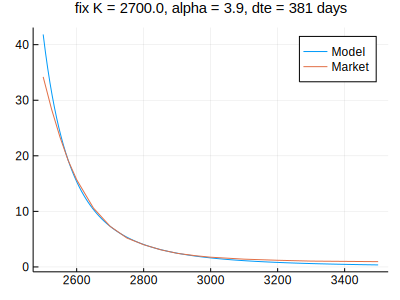

In [172]:
plot(
    [model_strikes, market_strikes],
    [model_prices, market_prices],
    lab = ["Model" "Market"],
    title = "fix K = $K_1, alpha = $α, dte = $dte",
    titlefontsize = 10,
)

Next, we'll plot different combination for $\alpha$ and `dte`.

In [160]:
Pkg.add("VegaLite");
using VegaLite;

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % %         ]  77.5 %Fetching: [=======================================> ]  96.4 % Resolving package versions...
 Installed JSONSchema ─────── v0.1.1
 Installed FilePaths ──────── v0.8.0
 Installed FilePathsBase ──── v0.6.2
 Installed NodeJS ─────────── v1.1.1
 Installed Setfield ───────── v0.5.4
 Installed ForwardDiff ────── v0.10.9
 Installed ConstructionBase ─ v1.0.0
 Installed VegaLite ───────── v1.0.0
  Updating `~/.julia/environments/v1.3/Project.toml`
  [112f6efa] + VegaLite v1.0.0
  Updating `~/.julia/environments/v1.3/Manifest.toml`
  [187b0558] + ConstructionBase v1.0.0
  [8fc22ac5] + FilePaths v0.8.0
  [48062228] ↓ FilePathsBase v0.7.0 ⇒ v0.6.2
  [f6369f11] ↑ ForwardDiff v0.10.8 ⇒ v0.10.9
  [7d188eb4] + JSONSchema v0.1.1
  [2bd173c7] + NodeJS v1.1.1
  [efcf1570] + Setfield v0.5.4
  [112f6efa

┌ Info: Precompiling VegaLite [112f6efa-9a02-5b7d-90c0-432ed331239a]
└ @ Base loading.jl:1273


In [266]:
final_df = DataFrame()
for dte in [Day(73), Day(164), Day(381)]
    for α in range(1.2, 3.0, length=4)
        subset_calls = filter(x -> x.dte == dte, calls)
        (_volume, idx) = findmax(subset_calls.volume)
        anchor = subset_calls[idx, :]
        C_1 = anchor.ask
        K_1 = anchor.strike
        S_0 = anchor.underlying_last

        price_call = price_gen(C_1, K_1, S_0, α)
        subset_calls[!, :alpha] .= α
        subset_calls[!, :model_price] = map(price_call, subset_calls.strike)
        final_df = vcat(final_df, subset_calls)
    end
end

rename!(final_df, :ask => :market_price)
final_df.dte = map(d -> d.value, final_df.dte); # Needed for VegaLite

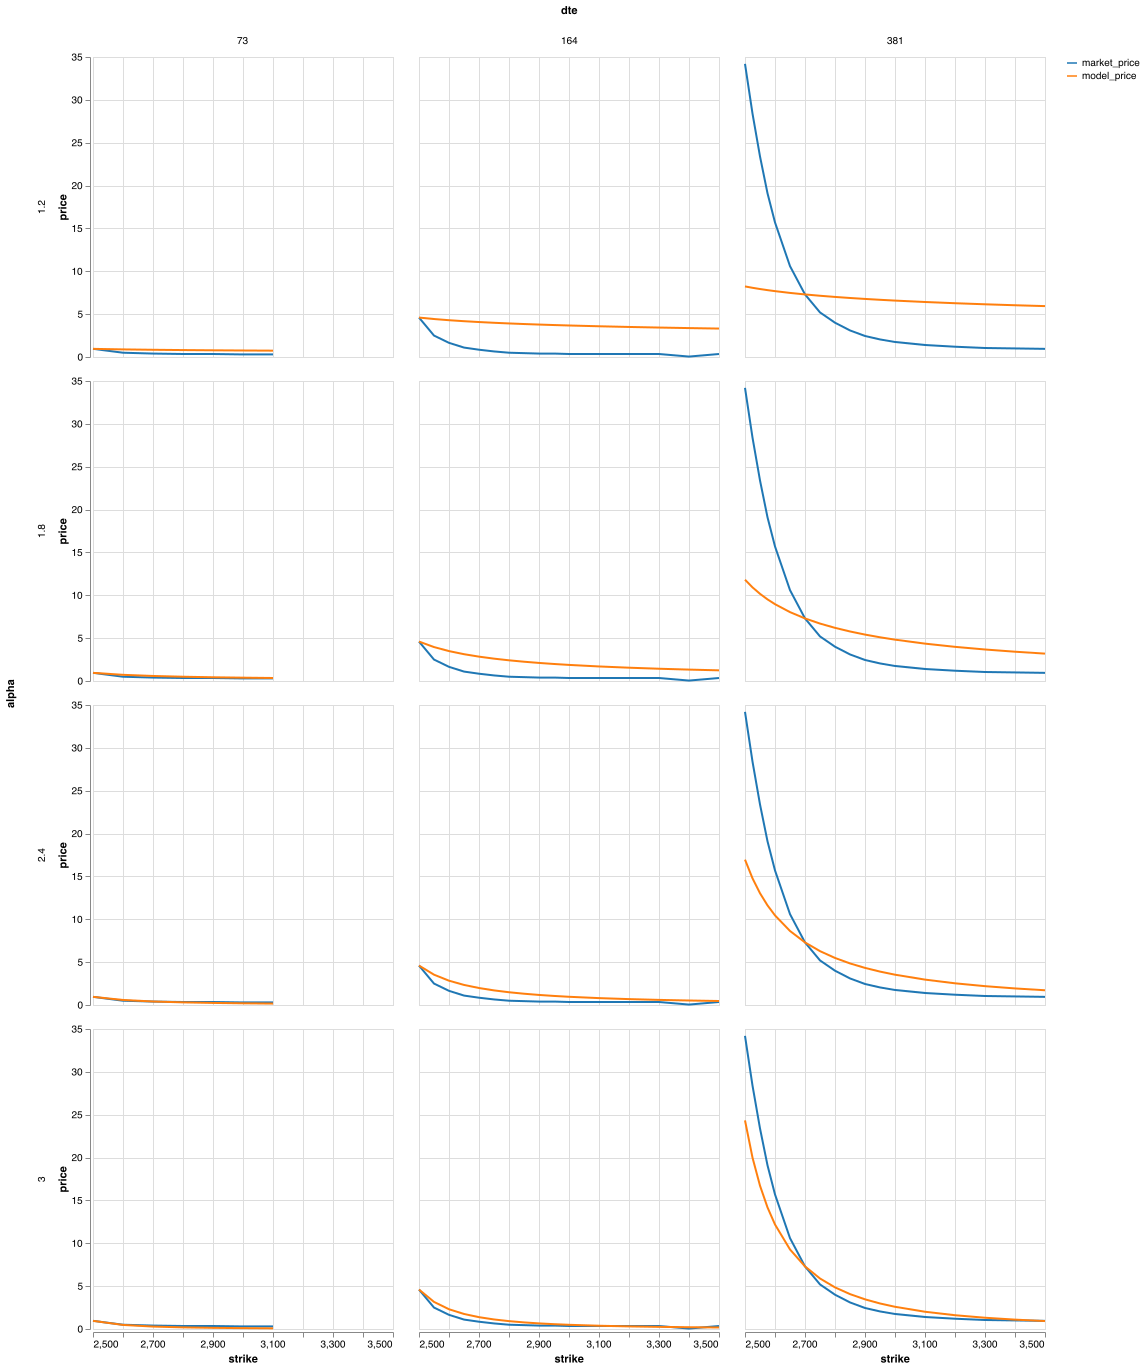

In [267]:
final_df |> @vlplot(:line, x=:strike, y={"value:Q", title="price"},
                    transform=[{fold=[:market_price, :model_price]}],
                    color={"key:O", title="", scale={scheme="category10"}},
                    row="alpha:O",
                    column="dte:O",
                    width=300,
                    height=300)

# Puts

#### Result 3: Put Pricing

$$P(K_2) = \frac{(-1)^{1-\alpha} S_0^{-\alpha} ((\alpha - 1) K_2 + S_0) - (K_2 - S_0)^{1 - \alpha}}{(-1)^{1-\alpha} S_0^{-\alpha} ((\alpha - 1) K_1 + S_0) - (K_1 - S_0)^{1 - \alpha}} P(K_1)$$

In [271]:
function put_price_gen(P_1::Float64, K_1::Float64, S_0::Float64, α::Float64)
    return K_2::Float64 -> ((-1)^(1 - α) * S_0^(1 - α) * ((α - 1) * K_2 + S_0) -
                            (K_2 - S_0)^(1 - α)) /
                           ((-1)^(1 - α) * S_0^(1 - α) * ((α - 1) * K_2 + S_0) -
                            (K_2 - S_0)^(1 - α)) * P_1
end

put_price_gen (generic function with 1 method)